In [ ]:
'''20.440 Problem Set 4
Name: Alexander Bevacqua
____
Reproducible, shareable code
Due 14 Mar 2022'''

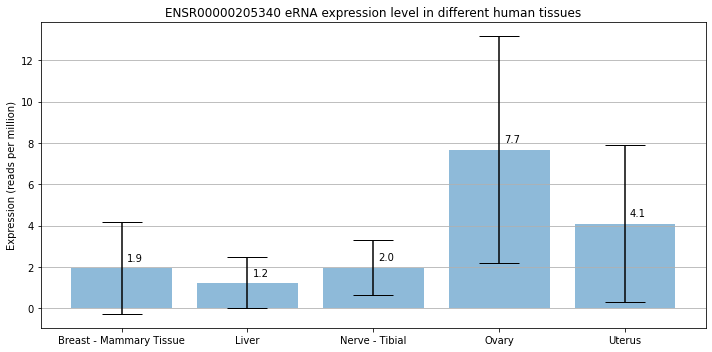

In [37]:
import os
import glob
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# In the current working directory, we get eRNA csv files
path = os.getcwd() + '/Data/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Set empty arrays for names, means, 
# and standard deviations
mean_expression_levels = []
std_expression_levels = []
names = []

# We loop through the eRNA expression csv files
for f in csv_files:
    
    # Extract the eRNA from the filename
    eRNA_identity = f.split('_')[3]
    
    # Getting the patient-measured expression levels
    df = pd.read_csv(f)
    expression = df["exp"].tolist()
    
    # Computing mean and standard deviation
    mean_expression_level = np.mean(expression)
    std_expression_level = np.std(expression)
    
    # Creating vectors with names, means, 
    # and standard deviations
    name = str(df.iloc[1][-1])
    mean_expression_levels.append(mean_expression_level)
    std_expression_levels.append(std_expression_level)
    names.append(name)

# Creating a bar graph with error bars
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(np.arange(len(names)), mean_expression_levels, 
       yerr=std_expression_levels, align='center', alpha=0.5, 
       ecolor='black', capsize=20)
plot_title = f'{eRNA_identity} eRNA expression level in different human tissues'

ax.set_title(plot_title)
ax.yaxis.grid(True)
ax.set_ylabel('Expression (reads per million)')
ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names)
plt.tight_layout()

i = 0
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{"{:.1f}".format(mean_expression_levels[i])}', 
                xy=(rect.get_x()+rect.get_width()/2, height),
                xytext=(5, 5), textcoords='offset points', 
                ha='left', va='bottom')
    i += 1
    

plt.savefig(f"Figures/Problem Set 4, {plot_title}.png", 
            dpi=300)
plt.show()
